In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
data = pd.read_csv('covid.csv')

In [102]:
data

,Date,DailyDeaths
0,1,3689
1,2,3417
2,3,3449
3,4,3780
4,5,3980
5,6,3915
6,7,4187
7,8,4077
8,9,3769
9,10,3876


In [103]:
colA = np.array(data.iloc[:,0].values)

In [104]:
colA

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [105]:
colB = np.array(data.iloc[:,1].values)

In [106]:
colB

array([3689, 3417, 3449, 3780, 3980, 3915, 4187, 4077, 3769, 3876, 4205,
       4120, 4000, 3890, 4077, 4106, 4329, 4529, 3874, 4209, 4194, 3741,
       4454, 3511, 4157, 3847, 3660, 3617, 3460, 3128, 2795])

In [107]:
mcolA = np.mat(colA)

In [108]:
mcolA

matrix([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]])

In [109]:
mcolB = np.mat(colB)

In [110]:
mcolB

matrix([[3689, 3417, 3449, 3780, 3980, 3915, 4187, 4077, 3769, 3876,
         4205, 4120, 4000, 3890, 4077, 4106, 4329, 4529, 3874, 4209,
         4194, 3741, 4454, 3511, 4157, 3847, 3660, 3617, 3460, 3128,
         2795]])

In [111]:
n, m = mcolB.shape

In [112]:
m

31

In [113]:
one = np.ones((1,m), dtype = int)

In [114]:
one

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [115]:
X = np.hstack((one.T, mcolA.T))

In [116]:
X.shape

(31, 2)

In [117]:
X

matrix([[ 1,  1],
        [ 1,  2],
        [ 1,  3],
        [ 1,  4],
        [ 1,  5],
        [ 1,  6],
        [ 1,  7],
        [ 1,  8],
        [ 1,  9],
        [ 1, 10],
        [ 1, 11],
        [ 1, 12],
        [ 1, 13],
        [ 1, 14],
        [ 1, 15],
        [ 1, 16],
        [ 1, 17],
        [ 1, 18],
        [ 1, 19],
        [ 1, 20],
        [ 1, 21],
        [ 1, 22],
        [ 1, 23],
        [ 1, 24],
        [ 1, 25],
        [ 1, 26],
        [ 1, 27],
        [ 1, 28],
        [ 1, 29],
        [ 1, 30],
        [ 1, 31]])

In [118]:
print(X.shape)

(31, 2)


In [119]:
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [120]:
def localWeight(point,xmat,ymat,k):
    wt = kernal(point,xmat,k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W

In [121]:
def kernal(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0 * k**2))
    return weights

In [122]:
ypred = localWeightRegression(X,mcolB,0.8)

In [123]:
ypred

array([3678.61110746, 3499.91111948, 3534.20088564, 3745.23396455,
       3912.19265017, 3992.26126972, 4085.77394337, 4023.85442166,
       3882.67980382, 3936.62666568, 4096.23973532, 4101.44994665,
       4008.45403405, 3967.91347483, 4044.97935937, 4154.67877942,
       4308.01110034, 4317.16624408, 4117.05228675, 4126.00821393,
       4092.53246752, 4012.66756989, 4063.33679381, 3886.55376233,
       3933.93114326, 3862.77635082, 3699.08368203, 3585.17246248,
       3409.69318462, 3124.29889004, 2795.27087137])

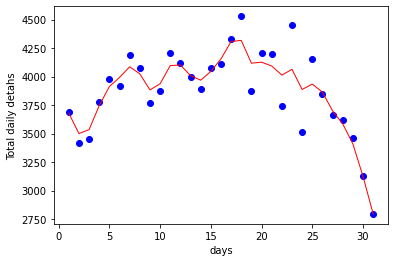

In [124]:
xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA,colB,color='blue')
plt.plot(xsort[:,1],ypred[X[:,1].argsort(0)],color='red',linewidth=1)
plt.xlabel('days')
plt.ylabel('Total daily detahs')
plt.show()

# Linear 

In [125]:
numday=22

In [126]:
totaldays=31

In [127]:
A=0

In [128]:
for i in range(0,22):
    A +=colA[i]

In [129]:
A

253

In [130]:
B = 0

In [131]:
for i in range(0,22):
    B+= colB[i]

In [132]:
B

87413

In [133]:
size = np.shape(colA)[0]

In [134]:
size

31

In [135]:
C = 0

In [136]:
for i in range(0,22):
    C+=(colA[i] * colA[i])

In [137]:
C

3795

In [138]:
D = 0

In [139]:
for i in range(0,22):
    D+=(colA[i] * colB[i])

In [140]:
print("value of d is ",D)
m=size

value of d is  1026269


In [141]:
W0 = 0

In [142]:
A = A
B = B
C = C
D = D

In [143]:
W0 = (((A*D)-(C*B))/((A*A)-(22*C)))

In [144]:
W1 = (((A*B)-(22*D))/((A*A)-(22*C)))

In [145]:
print(W0," ",W1)

3700.3376623376626   23.737436476566913


In [146]:
print(W0 + W1*0)
print(colB[0])

3700.3376623376626
3689


In [147]:
yvals1=[]

In [148]:
for i in range(22,31):
    yvals1.append(W0 + W1*colA[i])

In [149]:
yvals1

[4246.298701298701,
 4270.036137775269,
 4293.773574251835,
 4317.511010728403,
 4341.248447204969,
 4364.9858836815365,
 4388.723320158103,
 4412.460756634669,
 4436.198193111237]

In [150]:
mse1 = 0

for i in range(22,31):
    mse1+=((colB[i] - yvals1[i-22])*(colB[i] - yvals1[i-22]))

print(mse1/18)

#print(mse1/size,"is mean sq error of this sample")

393824.64380993915


In [151]:
print("death on 20th april ", (W0+(-10)*W1))

death on 20th april  3462.9632975719933


In [152]:
print("death on 10 june ", W0+ W1*41)

death on 10 june  4673.572557876906


# Quadratic

In [153]:
colC = colA.copy()

In [154]:
colC = colC[:22]

In [155]:
colC

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [156]:
for i in range(0,22):
    colC[i] = colC[i]*colC[i]

In [157]:
colC

mcolC = np.mat(colC)

In [158]:
mcolC

matrix([[  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
         196, 225, 256, 289, 324, 361, 400, 441, 484]])

In [159]:
colD = np.ones((1,22),dtype='int64')

In [160]:
mcolD = np.mat(colD)

In [161]:
mcolD

matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])

In [162]:
ccolA = colA[:22]

In [163]:
ccolA

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [164]:
mmcolA = np.mat(ccolA)

In [165]:
newX = np.hstack((mcolD.T,mmcolA.T,mcolC.T))

In [166]:
newX

matrix([[  1,   1,   1],
        [  1,   2,   4],
        [  1,   3,   9],
        [  1,   4,  16],
        [  1,   5,  25],
        [  1,   6,  36],
        [  1,   7,  49],
        [  1,   8,  64],
        [  1,   9,  81],
        [  1,  10, 100],
        [  1,  11, 121],
        [  1,  12, 144],
        [  1,  13, 169],
        [  1,  14, 196],
        [  1,  15, 225],
        [  1,  16, 256],
        [  1,  17, 289],
        [  1,  18, 324],
        [  1,  19, 361],
        [  1,  20, 400],
        [  1,  21, 441],
        [  1,  22, 484]])

In [167]:
mmcolB= np.mat(colB[:22])

In [168]:
w=np.dot(np.linalg.inv(np.dot(newX.T,newX)),np.dot(newX.T,mmcolB.T))

In [169]:
print(w)

[[ 3.42722727e+03]
 [ 9.20150339e+01]
 [-2.96859119e+00]]


In [170]:
print("value of W0 is ",w[0]," value of W1 is ",w[1],"value of W2 is ",w[2])

value of W0 is  [[3427.22727273]]  value of W1 is  [[92.01503388]] value of W2 is  [[-2.96859119]]


In [171]:
yvals =[]

In [172]:
for i in range(22,31):
    yvals.append(1*w[0]+colA[i]*w[1]+(colA[i]*colA[i])*w[2])
    #print(row)
    #yvals.append(row)

In [173]:
yvals

[matrix([[3973.18831169]]),
 matrix([[3925.67955957]]),
 matrix([[3872.23362507]]),
 matrix([[3812.85050819]]),
 matrix([[3747.53020892]]),
 matrix([[3676.27272727]]),
 matrix([[3599.07806324]]),
 matrix([[3515.94621683]]),
 matrix([[3426.87718803]])]

In [174]:
#mean square error
mse=0
for i in range(22,31):
    mse+=(colB[i] - yvals[i-22].item(0,0))*(colB[i] - yvals[i-22].item(0,0))

In [175]:
print(mse/18,"is mean sq error of this sample")

59204.75789298179 is mean sq error of this sample


In [176]:
print("death on 20th april ", w[0]+(-10)*w[1]+(-100)*w[2])

death on 20th april  [[2803.93605308]]


In [177]:
print("death on 20th april ", w[0]+(41)*w[1]+(1681)*w[2])

death on 20th april  [[2209.641869]]
